# Machine learning
## Algoritmos básicos:  Máquinas de Soporte Vectorial y K-Nearest Neighbors (KNN)
---


In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

## Máquina de Soporte Vectorial (SVM)
---






Es un algoritmo de aprendizaje automático (machin lernin) supervisado que se puede utilizar para problemas de **clasificación o regresión**. Pero generalmente se usa para **clasificar**.



Dadas 2 o más clases de datos etiquetadas, actúa como un clasificador discriminativo, definido formalmente por un **hiperplano** óptimo que separa todas las clases. Los nuevos ejemplos que luego se mapean en ese mismo espacio se pueden clasificar según el lado de la brecha en que se encuentran.


> Como regla general, las SVM son excelentes para conjuntos de datos relativamente pequeños con menos valores atípicos.

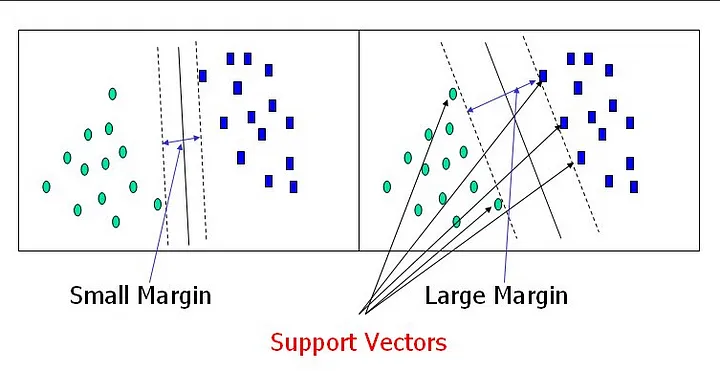

Los **vectores de soporte** son los puntos de datos **más cercanos al hiperplano**, los puntos de un conjunto de datos que, si se eliminan, alterarían la posición del hiperplano en división. Debido a esto, pueden considerarse los elementos críticos de un conjunto de datos, son los que nos ayudan a construir nuestra SVM.

### **Cómo funciona**

Imaginemos que tenemos dos etiquetas: **rojos** y **azules** , y nuestros datos tiene dos características : x e y . Queremos un clasificador que, dado un par de coordenadas (x, y) , dé como resultado si es rojo o azul . Trazamos nuestros datos de entrenamiento ya etiquetados

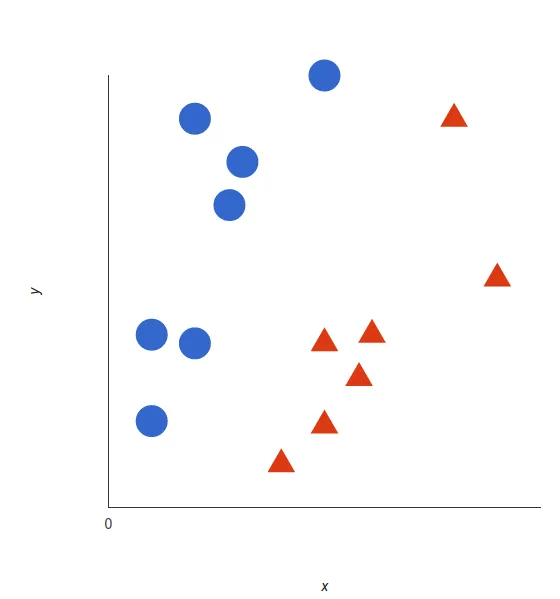

Una máquina de vectores de soporte toma estos puntos de datos y genera el hiperplano (que en dos dimensiones es simplemente una línea) que separa mejor las etiquetas. Esta línea es el **límite de decisión** : todo lo que caiga a un lado lo clasificaremos como azul y todo lo que caiga al otro lado como rojo .

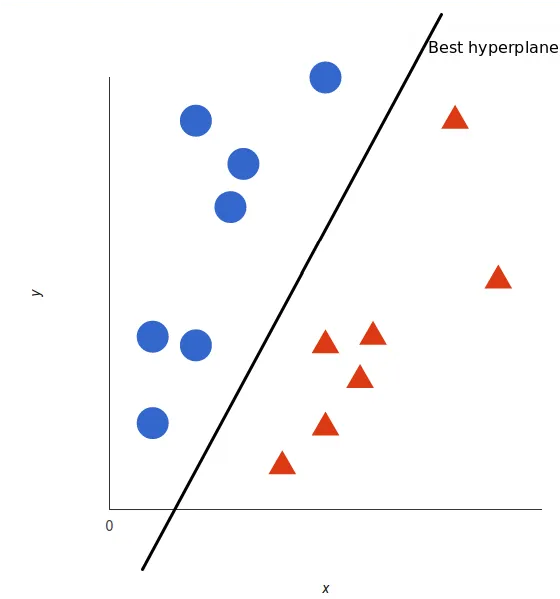

Pero, ¿cuál es exactamente el **mejor hiperplano**? Para SVM, es el que maximiza los márgenes de ambas etiquetas. En otras palabras: el hiperplano (recuerden que es una línea en este caso) cuya distancia al elemento más cercano de cada etiqueta es la más grande.

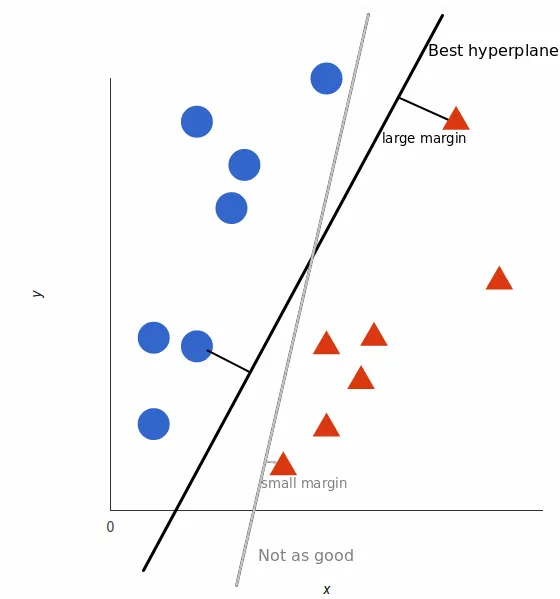

**Ejemplo sencillo**:

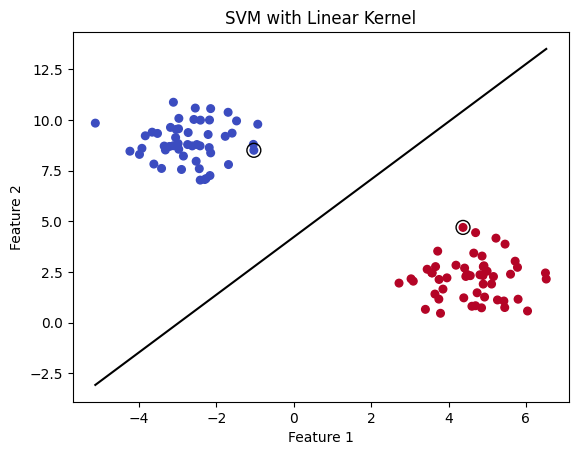

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generar datos sintéticos
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# Crear un modelo SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Visualizar los datos y el hiperplano
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')

# Obtener el hiperplano y el margen
w = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = -w[0] / w[1] * xx - b / w[1]

# Graficar el hiperplano
plt.plot(xx, yy, 'k-')

# Visualizar los vectores de soporte
support_vectors = model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')
plt.show()

#### **Diferencias clave**

**Objetivo**
- **Clasificación lineal**: Separa los datos en categorías o clases distintas. El objetivo es encontrar una línea (o un hiperplano en dimensiones superiores) que separe correctamente los puntos de datos en sus respectivas clases.
- **Regresión lineal**: Predice un valor continuo. El objetivo es ajustar una línea (o una función) que prediga valores numéricos en lugar de asignar una clase.

**Salida**
- **Clasificación**: La salida son etiquetas de clases, por ejemplo, 0 o 1, que indican a qué clase pertenece cada punto de datos.
- **Regresión**: La salida es un número real, que representa el valor predicho para una entrada determinada.

**Margen**
- **Clasificación**: Se maximiza el margen entre las clases, es decir, la distancia entre la línea de decisión y los puntos más cercanos de cada clase.
- **Regresión**: Se minimiza el error dentro de un margen aceptable (llamado "tubo de regresión"), con la idea de permitir pequeñas desviaciones sin penalizarlas demasiado.

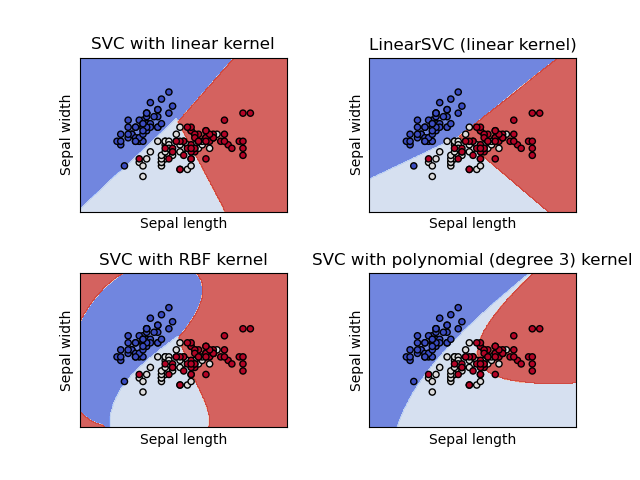

### **Kernels**

Un kernel transforma un espacio de datos de entrada en la forma requerida

Más formalmente, es una función matemática que permite proyectar los datos de entrada a un espacio de mayor dimensión, facilitando que los datos sean linealmente separables.

En muchas ocasiones, los datos no son linealmente separables en su espacio original. Es decir, no es posible encontrar una línea recta (en 2D) o un hiperplano (en más dimensiones) que divida correctamente las clases. El kernel transforma los datos a un espacio de mayor dimensión donde sí sea posible encontrar esa frontera lineal que separe las clases.

> Prácticamente, lo que nos ayudan los kernels es que, en lugar de transformar nuestros datos de una dimensión (por ejemplo 2D) a otra (por ejemplo 3D), simulan el cálculo en un espacio de mayor dimensionalidad sin hacer la transformación explícita. Calculan el producto interno de los datos en el espacio original como si estuvieran en esa dimensión mayor, lo que ahorra muchos cálculos y permite obtener el hiperplano que los separe.

#### Tipos de kernel

- **Lineal**: No transforma los datos, útil cuando los datos ya son linealmente separables.





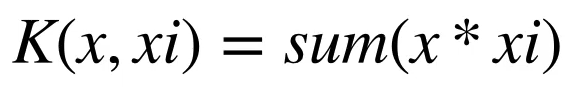

Osea, este kernel es simplemente el producto interno estándar de dos vectores en su espacio original. No transforma los datos a un espacio de mayor dimensionalidad, lo que lo hace adecuado para datos que son linealmente separables. Es útil cuando los datos ya se pueden separar con una línea recta (o hiperplano en dimensiones superiores).

- **Polinómico**: Proyecta los datos en un espacio de dimensiones más altas utilizando polinomios.


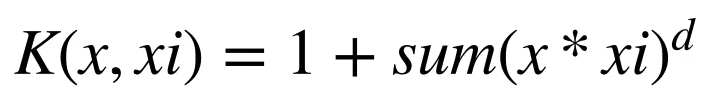

Osea, este kernel eleva el producto interno de los vectores a una potencia y añade un término de sesgo. Al hacerlo, puede capturar relaciones no lineales entre los datos al proyectarlos en un espacio de características de mayor dimensionalidad. El grado del polinomio (d) controla la flexibilidad de la separación.

- **RBF (Radial Basis Function o Gaussiano)**: Es el kernel más comúnmente utilizado. Proyecta los datos en un espacio de dimensionalidad infinita.


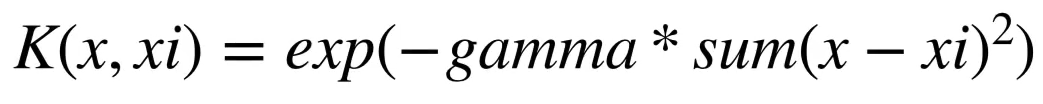

Osease que XD, este kernel mide la distancia entre los vectores *x* y *y* y aplica una función exponencial que decrece a medida que los vectores se alejan. Al hacerlo, proyecta los datos en un espacio de características de dimensión infinita, donde pueden separarse incluso si la relación entre los datos es muy compleja.

### Truco del Kernel

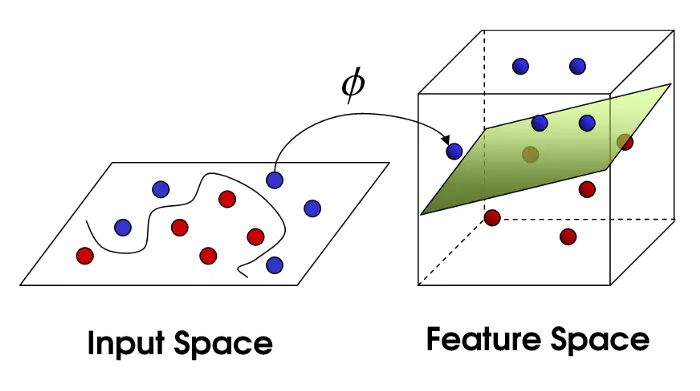

> El truco del kernel que le permite ampliar los datos en infinitas dimensiones.

El teorema de Mercer determina qué funciones pueden ser usadas como función de kernel. En matemáticas, específicamente en el análisis funcional, el teorema de Mercer establece que una matriz simétrica y definida positiva puede ser representada como la suma de una secuencia convergente de productos de funciones

**OSEASE**: el teorema de Mercer ayuda a determinar si una función puede usarse como un "kernel", que es una herramienta matemática clave en algunos algoritmos de aprendizaje automático, como las máquinas de soporte vectorial (SVM) (osea no sólo se puede usar para el algoritmo SVM).

El teorema dice que, si tomas una función que compara pares de datos y usas esa función para crear una matriz (una tabla que contiene esas comparaciones), esa matriz debe tener ciertas propiedades (debe ser "positiva semidefinida"). Si cumple con estas propiedades, entonces la función es válida como kernel, lo que permite que el algoritmo trabaje de manera eficiente en espacios más complejos sin tener que hacer cálculos directos en esos espacios.

### Ejemplos: Clasificación lineal

#### Ejemplo 1

Precisión del modelo: 1.00


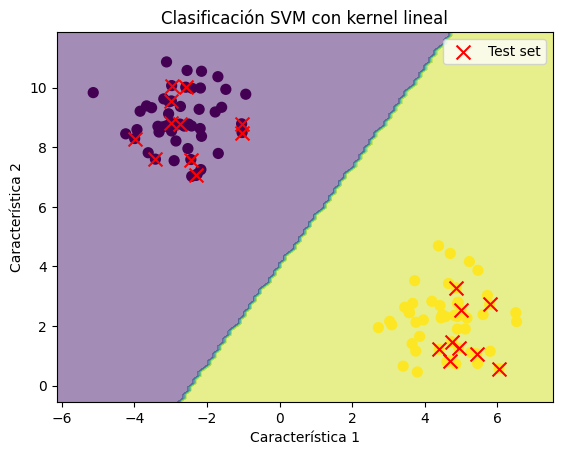

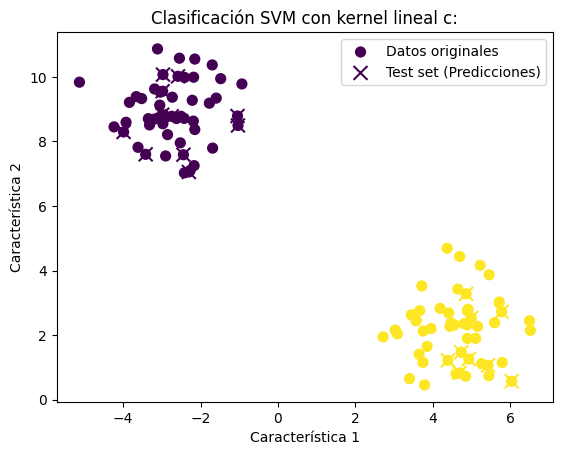

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generar datos simulados
# n_samples para cuantas muestras, centers para los clusters (cuantos grupos), y random es la semilla
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# ================== Crear una malla para graficar la frontera de decisión ==================
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # minimo y maximo del primer eje
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir las etiquetas para cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', s=100, label='Test set')
plt.title('Clasificación SVM con kernel lineal')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()
# ============================================================================================

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, label='Datos originales')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', s=100, label='Test set (Predicciones)')
plt.title('Clasificación SVM con kernel lineal c:')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

##### Interpretando este ejercicio


En principio, los puntos de los datos. Representan las coordenadas de los datos generados. Cada punto tiene dos características (por ejemplo, Característica 1 y Característica 2), que son las dos dimensiones de tus datos.

Ahora, las predicciones. Los puntos rojos que marcamos como Test set son las instancias del conjunto de prueba que el modelo ha clasificado. La posición de estos puntos en el gráfico corresponde a sus coordenadas originales en el conjunto de prueba (X_test).

Y ahora, la región coloreada (la frontera de decisión) muestra cómo el modelo ha clasificado el espacio. Cada color representa una clase diferente según el modelo:

- Si un punto de prueba cae dentro de una región de un color específico, eso significa que el modelo predice que pertenece a esa clase.

#### Ejemplo 2

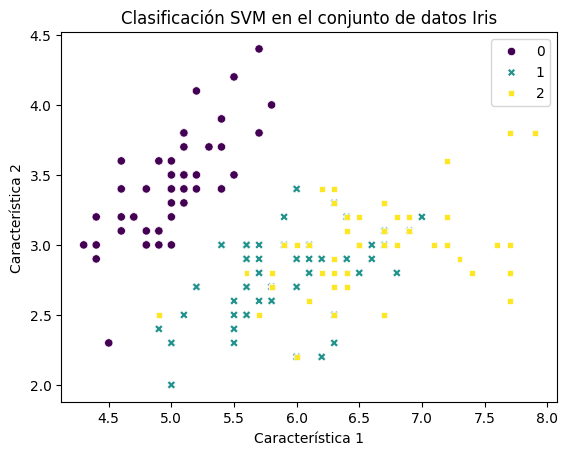

In [4]:
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix # para evaluar (:

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar solo las dos primeras características que son la longitud y el ancho del sépalo
y = iris.target

# Dividir los datos en conjuntos: 80% pa entrenamiento y 20% pa prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Ke se haga la magia (entrenamos el modelo)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Visualizar los resultados
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', style=y)
plt.title('Clasificación SVM en el conjunto de datos Iris')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


Vemos que tan bien clasificaron los pétalos.

In [5]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



La matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación. Muestra la cantidad de predicciones correctas e incorrectas que el modelo ha hecho, organizadas en cuatro categorías:

- Verdaderos Positivos (VP): Casos positivos correctamente clasificados.
- Falsos Positivos (FP): Casos negativos clasificados erróneamente como positivos.
- Verdaderos Negativos (VN): Casos negativos correctamente clasificados.
- Falsos Negativos (FN): Casos positivos clasificados erróneamente como negativos.

A partir de estos valores, se pueden calcular métricas como la precisión, el recall y la exactitud.

El informe de clasificación es un resumen que presenta estas métricas de evaluación del modelo de clasificación. Incluye información sobre la precisión, el recall y la puntuación F1 para cada clase del modelo, ayudando a entender cómo se está desempeñando en general y en detalle para cada categoría.

#### Ejemplo 3

Precisión del modelo: 0.98


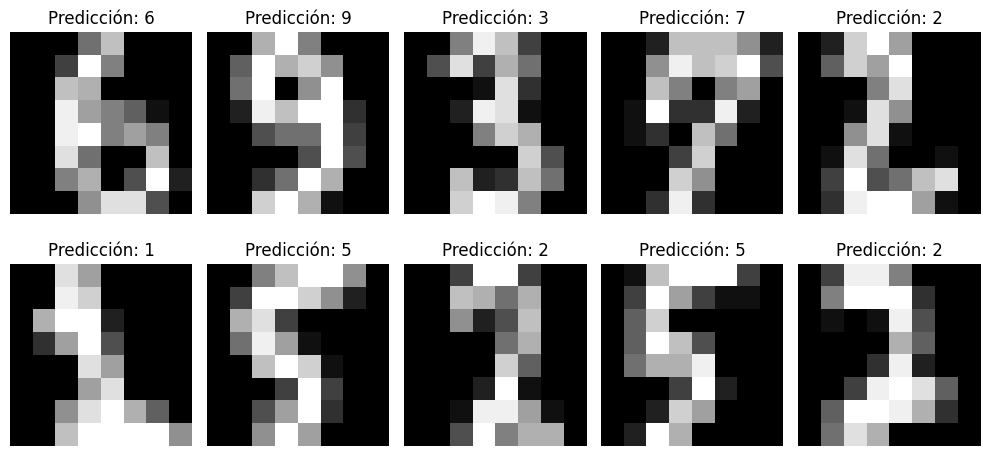

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de dígitos
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Visualizar algunos dígitos y sus predicciones
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Predicción: {y_pred[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

Entendiendo el tercer ejemplo:

- Cada imagen de dígitos de 8x8 píxeles se convierte en un vector de 64 dimensiones (8 filas por 8 columnas), donde cada valor representa la intensidad del píxel.

- Cada imagen tiene una etiqueta (en este caso, un dígito del 0 al 9). El SVM se entrena para encontrar un límite de decisión que separe estas clases.

- El SVM selecciona un hiperplano en un espacio de características de dimensión n, donde n es el número de características (en este caso, 64).

- Una vez que se ha entrenado el modelo, para clasificar una nueva imagen:

    - Se convierte en un vector de características.
    - Se calcula en qué lado del hiperplano cae este vector.
    - Dependiendo de si cae en un lado u otro, se clasifica en una clase específica (por ejemplo, un dígito del 0 al 9).

## Ejemplos extras


### Más ejemplitos: Clasificación Lineal -> Viendo lineas de desición/hiperplano

#### Ejemplo 1.1

Vamos a clasificar puntos en un plano 2D utilizando un kernel lineal. El objetivo es separar dos clases de puntos (0 y 1) mediante una línea recta.

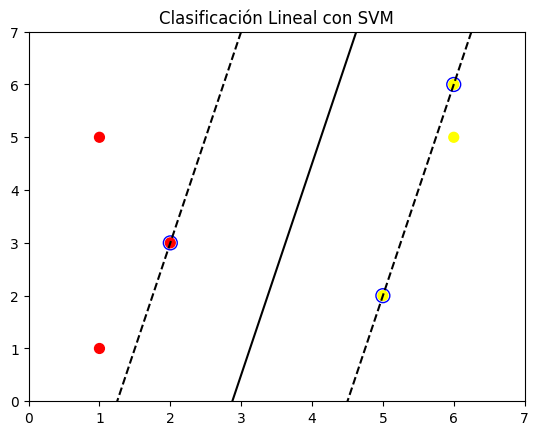

In [7]:
from sklearn import svm

# Crear datos de entrenamiento (puntos 2D)
X = np.array([[2, 3], [1, 5], [1, 1], [6, 6], [6, 5], [5, 2]])  # Coordenadas (x, y)
y = np.array([0, 0, 0, 1, 1, 1])  # Etiquetas de clase (0 y 1)

# Crear el modelo SVM con kernel lineal
model = svm.SVC(kernel='linear')

# Entrenar el modelo
model.fit(X, y)

# Graficar los puntos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Crear una cuadrícula para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(0, 7, 500), np.linspace(0, 7, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión y los márgenes
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='blue')
plt.title("Clasificación Lineal con SVM")
plt.show()


#### Ejemplo 1.2

Este ejemplo clasifica frutas (manzanas y naranjas) basadas en su peso y textura.

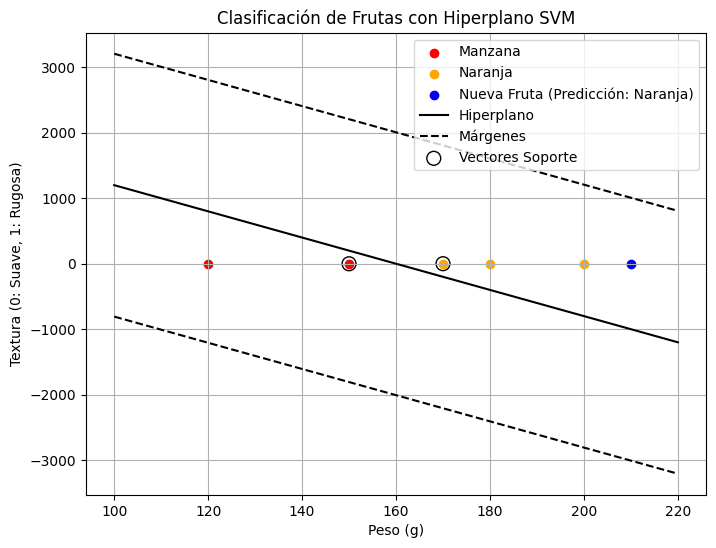

In [8]:
# Definir datos de entrenamiento (peso y textura: suave=0, rugosa=1)
# Manzanas -> 0, Naranjas -> 1
X = np.array([[150, 0], [200, 1], [170, 1], [120, 0], [180, 1]])
y = np.array([0, 1, 1, 0, 1])

# Crear el modelo SVM
model = svm.SVC(kernel='linear')

# Entrenar el modelo
model.fit(X, y)

# Predecir una nueva fruta (Peso=160g, Textura=rugosa (1))
nueva_fruta = np.array([[210, 1]])
prediccion = model.predict(nueva_fruta)

# Mostrar resultado de la predicción
resultado = "Naranja" if prediccion == 1 else "Manzana"

# Función para graficar el hiperplano y márgenes
def plot_hyperplane(clf, X, y):
    plt.figure(figsize=(8, 6))

    # Graficar los puntos de datos
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Manzana')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Naranja')

    # Graficar la nueva fruta
    plt.scatter(nueva_fruta[:, 0], nueva_fruta[:, 1], color='blue', label='Nueva Fruta (Predicción: ' + resultado + ')')

    # Obtener los coeficientes del hiperplano
    coef = clf.coef_[0]
    intercept = clf.intercept_[0]

    # Hiperplano: coef[0] * x1 + coef[1] * x2 + intercept = 0
    # Para calcular la línea del hiperplano:
    x_values = np.linspace(100, 220, 100)
    y_values = -(coef[0] / coef[1]) * x_values - intercept / coef[1]

    # Graficar el hiperplano
    plt.plot(x_values, y_values, 'k-', label='Hiperplano')

    # Márgenes
    margin = 1 / np.sqrt(np.sum(coef ** 2))
    y_values_margin1 = y_values + margin / np.abs(coef[1])
    y_values_margin2 = y_values - margin / np.abs(coef[1])

    # Graficar los márgenes
    plt.plot(x_values, y_values_margin1, 'k--', label='Márgenes')
    plt.plot(x_values, y_values_margin2, 'k--')

    # Resaltar los vectores soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Vectores Soporte')

    # Configuración de la gráfica
    plt.xlabel('Peso (g)')
    plt.ylabel('Textura (0: Suave, 1: Rugosa)')
    plt.title('Clasificación de Frutas con Hiperplano SVM')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
plot_hyperplane(model, X, y)

#### Ejemplo 1.3

**Dataset Iris** para clasificar dos tipos de flores basadas en dos características (largo y ancho del sépalo). Este conjunto de datos tiene 3 clases de flores, pero para simplificar usaremos solo dos clases.

Precisión del modelo: 100.00%


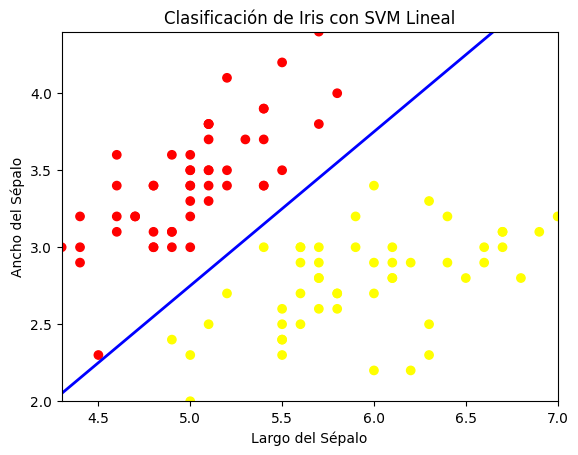

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características (largo y ancho del sépalo)
y = iris.target

# Filtrar solo las clases 0 (Setosa) y 1 (Versicolor)
X = X[y != 2]
y = y[y != 2]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Graficar los datos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

# Crear una cuadrícula para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500), np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')
plt.title("Clasificación de Iris con SVM Lineal")
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.show()


- El SVM con un kernel lineal trata de encontrar un hiperplano (en 2D, una línea) que maximice el margen entre las dos clases.
- Los vectores soporte son los puntos más cercanos a la línea de decisión. Estos puntos son cruciales para definir la posición del hiperplano.

### Ejemplo 2: Regresión con SVM

Este es un ejemplo básico de regresión lineal utilizando SVR. Vamos a predecir valores continuos usando una línea recta para ajustar los datos.

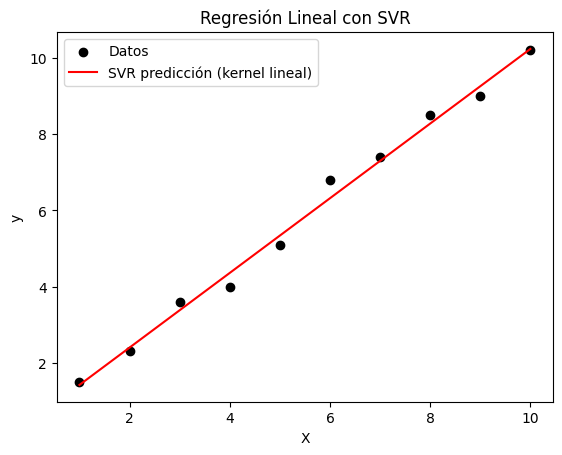

In [10]:
from sklearn.svm import SVR

# Crear datos de entrenamiento (línea con algo de ruido)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.5, 2.3, 3.6, 4.0, 5.1, 6.8, 7.4, 8.5, 9.0, 10.2])

# Crear el modelo SVR con kernel lineal
model = SVR(kernel='linear')

# Entrenar el modelo
model.fit(X, y)

# Predecir en una gama de valores
X_pred = np.linspace(1, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Graficar los datos y la predicción
plt.scatter(X, y, color='black', label='Datos')
plt.plot(X_pred, y_pred, color='red', label='SVR predicción (kernel lineal)')
plt.title('Regresión Lineal con SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


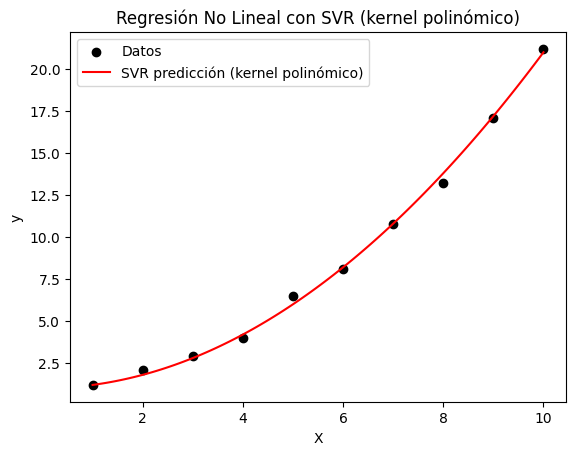

In [11]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Crear datos de entrenamiento (relación no lineal)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.2, 2.1, 2.9, 4.0, 6.5, 8.1, 10.8, 13.2, 17.1, 21.2])

# Crear el modelo SVR con kernel polinómico
model = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)

# Entrenar el modelo
model.fit(X, y)

# Predecir en una gama de valores
X_pred = np.linspace(1, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Graficar los datos y la predicción
plt.scatter(X, y, color='black', label='Datos')
plt.plot(X_pred, y_pred, color='red', label='SVR predicción (kernel polinómico)')
plt.title('Regresión No Lineal con SVR (kernel polinómico)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Este ejemplo usa un modelo de regresión SVM para predecir la calificación de estudiantes en función de las horas de estudio.

In [12]:
# Importar librerías
from sklearn.svm import SVR
import numpy as np

# Datos de entrenamiento: Horas de estudio y calificaciones
X = np.array([[2], [4], [6], [8], [10]])  # Horas de estudio
y = np.array([50, 60, 70, 80, 90])  # Calificación

# Crear el modelo SVR
model = SVR(kernel='linear')

# Entrenar el modelo
model.fit(X, y)

# Predecir la calificación para un estudiante que estudia 5 horas
horas_estudio = np.array([[5]])
calificacion_predicha = model.predict(horas_estudio)

# Mostrar resultado
print(f"Calificación predicha para 5 horas de estudio: {calificacion_predicha[0]:.2f}")


Calificación predicha para 5 horas de estudio: 65.03


### Ejemplo 3: Clasificación No Lineal con Kernel RBF

Utiliza un conjunto de datos más complejo donde las clases no pueden separarse linealmente. Usamos un kernel RBF para transformar los datos a un espacio de mayor dimensión y realizar la clasificación.

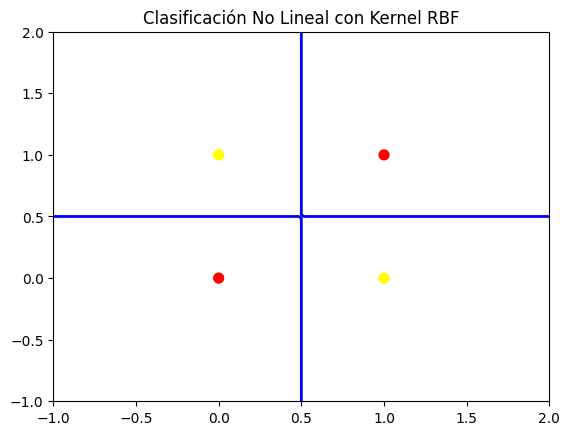

In [13]:
from sklearn import svm

# Datos de entrenamiento (XOR problem: no separable linealmente)
X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([0, 0, 1, 1])  # Etiquetas: 0 y 1

# Crear el modelo SVM con kernel RBF
model = svm.SVC(kernel='rbf')

# Entrenar el modelo
model.fit(X, y)

# Graficar los puntos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Crear una cuadrícula para la predicción
xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')
plt.title("Clasificación No Lineal con Kernel RBF")
plt.show()


##  K-Nearest Neighbors (KNN)
---

El algoritmo K-Nearest Neighbors (K-NN) es uno de los métodos más simples y populares en machine learning supervisado, usado tanto para **clasificación** como para **regresión**.

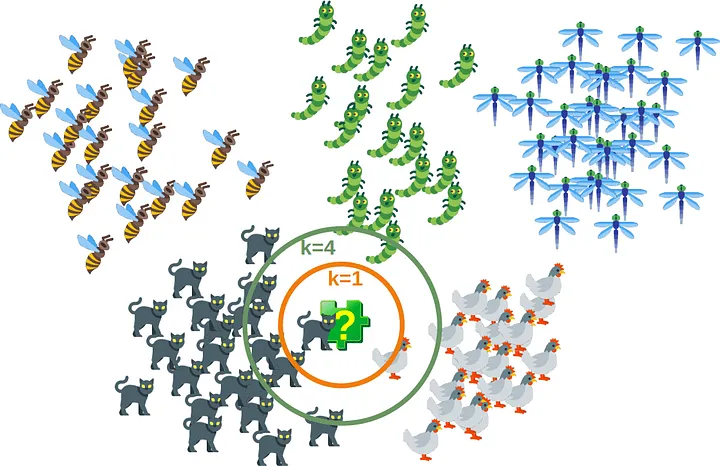

**Almacenamiento de los datos de entrenamiento**: K-NN no tiene una fase de entrenamiento como otros algoritmos. Simplemente almacena los datos y, cuando se hace una predicción, se basa en ellos.

**Predicción basada en la cercanía**: Para predecir la clase o el valor de una nueva instancia (punto de datos), el algoritmo:

- Calcula la distancia (normalmente usando distancia **euclidiana**) entre el nuevo punto y todos los puntos del conjunto de entrenamiento.
- Encuentra los K puntos más cercanos (neighbors).
- En clasificación, asigna la clase más frecuente entre esos vecinos.
- En regresión, toma el promedio de los valores de los vecinos.

**Ventajas**:

  - Simple de entender e implementar.
  - No asume ninguna hipótesis sobre la distribución de los datos (no paramétrico).

**Desventajas**:

  - Es computacionalmente costoso, ya que para cada predicción debe calcularse la distancia a todos los puntos de entrenamiento.
  - No funciona bien con datos de alta dimensionalidad (es decir, cuando tienes muchas características).

### Parámetros clave

**K (número de vecinos)**: Es un hiperparámetro que defines tú. Un valor pequeño de K puede hacer que el modelo sea muy sensible a los datos ruidosos (overfitting), mientras que un valor grande puede hacer que el modelo sea demasiado general (underfitting).

- Un número pequeño de K regularmente indica un bajo sesgo pero una gran varianza (**Overfitting**)

- Un número grande de K regularmente indica gran sesgo pero poca varianza (**Underfitting**)



**Distancia**: La distancia euclidiana es la más usada, pero también podemos usar otras métricas de distancia como la distancia de Manhattan o la distancia de Minkowski, dependiendo del problema.

### Pasos en KNN

1. Inicializar nuestros datos, y nuestro punto que queremos clasificar

2. Calcular la distancia entre el punto a clasificar y sus puntos alrededor. Esto se puede hacer con unas ecuaciones como la Euclidiano o la Manhattan, sin embargo la Euclidiana es la más popular.


3. Podemos ordenar los vecinos más cercanos el punto a clasificar por distancias en orden ascendente.

4. De acuerdo al a variable K que definimos, vemos cual del grupo de datos clasificado tenga el mayor numero de vecinos.
> Por ejemplo, si k=5, y tenemos 10 vecinos de los cuales 3 cercanos son manzanas y 2 cercanos son peras, por mayoria, se diría que el punto a clasificar es una manzana.

In [14]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data[:,2], iris.target # Tomamos solo las primeras dos features (X)

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X[:, None], y)

KNeighborsClassifier(n_neighbors=10)

El mejor valor de K lo podemos

### Ejemplitos

#### Ejemplo 1

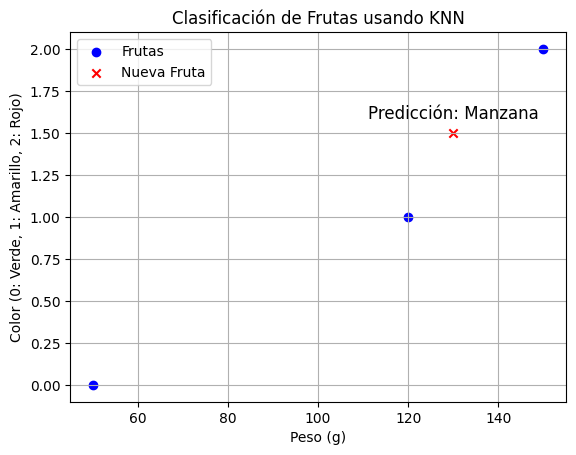

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Datos de entrenamiento (Peso, Color)
X = np.array([[150, 2],   # Manzana
              [120, 1],   # Plátano
              [50, 0]])   # Uva

# Etiquetas de las frutas
y = np.array(['Manzana', 'Plátano', 'Uva'])

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Nuevo dato (130, 1.5)
nuevo_dato = np.array([[130, 1.5]])
prediccion = knn.predict(nuevo_dato)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Frutas', marker='o')
plt.scatter(nuevo_dato[0, 0], nuevo_dato[0, 1], c='red', label='Nueva Fruta', marker='x')
plt.title('Clasificación de Frutas usando KNN')
plt.xlabel('Peso (g)')
plt.ylabel('Color (0: Verde, 1: Amarillo, 2: Rojo)')
plt.legend()
plt.grid()
plt.annotate(f'Predicción: {prediccion[0]}', xy=(nuevo_dato[0, 0], nuevo_dato[0, 1]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.show()


#### Ejemplo 2

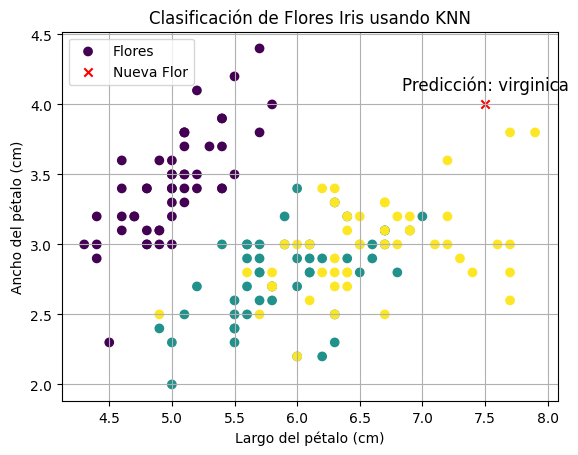

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características (Largo y Ancho del pétalo)
y = iris.target

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Nuevo dato (5.0, 1.8)
nuevo_dato = np.array([[7.5, 4.0]])
prediccion = knn.predict(nuevo_dato)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Flores')
plt.scatter(nuevo_dato[0, 0], nuevo_dato[0, 1], c='red', label='Nueva Flor', marker='x')
plt.title('Clasificación de Flores Iris usando KNN')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.legend()
plt.grid()
plt.annotate(f'Predicción: {iris.target_names[prediccion[0]]}',
             xy=(nuevo_dato[0, 0], nuevo_dato[0, 1]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.show()


#### Ejemplo 3

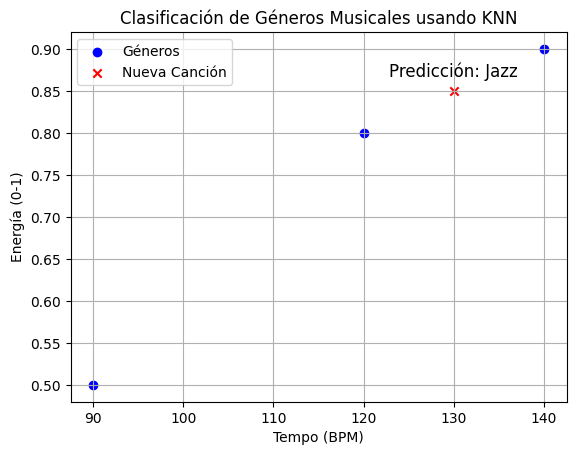

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Datos de entrenamiento (Tempo, Energía)
X = np.array([[120, 0.8],   # Pop
              [140, 0.9],   # Rock
              [90, 0.5]])    # Jazz

# Etiquetas de los géneros
y = np.array(['Pop', 'Rock', 'Jazz'])

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Nuevo dato (130, 0.85)
nuevo_dato = np.array([[130, 0.85]])
prediccion = knn.predict(nuevo_dato)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Géneros', marker='o')
plt.scatter(nuevo_dato[0, 0], nuevo_dato[0, 1], c='red', label='Nueva Canción', marker='x')
plt.title('Clasificación de Géneros Musicales usando KNN')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energía (0-1)')
plt.legend()
plt.grid()
plt.annotate(f'Predicción: {prediccion[0]}',
             xy=(nuevo_dato[0, 0], nuevo_dato[0, 1]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.show()


---
## Tareita :o
---

* Iniciar el día con toda la actitud 😃
* Repasar C:



---
## Tareita moral
---

Vean los siguientes videitos:
* https://www.youtube.com/watch?v=_YPScrckx28
* https://youtu.be/Q7vT0--5VII?si=iyC89qaLtDJ8dvGm
* https://youtu.be/b6uHw7QW_n4?si=oXGZ9HDi2XYihPrZ

